In [13]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("E:\GitHub Launcher\Churn Analysis and Prediction\csv\Telco-Customer-Churn.csv")

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.shape

(7043, 21)

## **Exploratory Data Analysis**

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0]==2:
        binary_cols.append(col)

In [21]:
binary_cols  # categoryical features with two classes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

The remaining categorical variables have more than two values (or classes).

In [22]:
# Categorical features with multiple classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

## **Binary categorical features**

Let's check the class distribution of binary features.

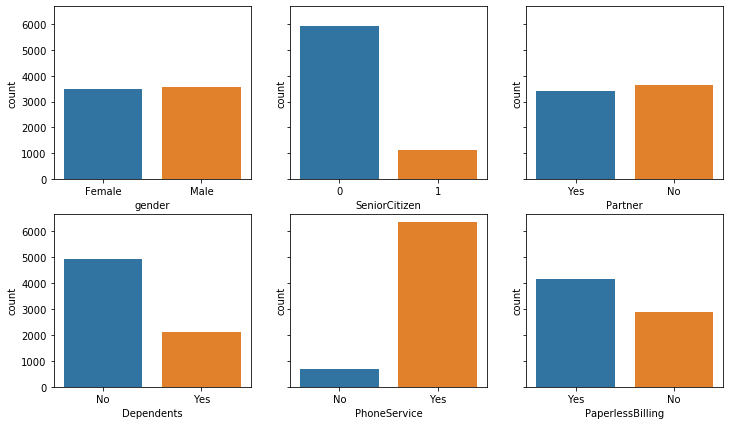

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

It is better to check how the target variable (churn) changes according to the binary features. To be able to make calculations, we need to change the values of target variable. "Yes" will be 1 and "No" will be 0.

In [24]:
churn_numeric = []
for i in range(len(df)):
    if df['Churn'][i] == 'Yes':
        churn_numeric.append(1)
    else:
        churn_numeric.append(0)

In [25]:
churn_numeric[:5]

[0, 0, 1, 0, 1]

In [26]:
df['Churn'] = churn_numeric

In [27]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

In [28]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [29]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [30]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [31]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [32]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


The other binary features have an effect on the target variable. The phone service may also be skipped if you think 2% difference can be ignored. I have decided to use this feature in the model.

You can also use pandas pivot_table function to check the relationship between features and target variable.

In [33]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [34]:
table = pd.pivot_table(df, values='Churn', index=['Partner'],
                    columns=['Dependents'], aggfunc=np.mean)
table

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


## **Other Categorical Features¶**

It is time to explore other categorical features. We also have continuous features such as tenure, monthly charges and total charges which I will discuss in the next part.

There are 6 variables that come with internet service. There variables come into play if customer has internet service.

**Internet Service**

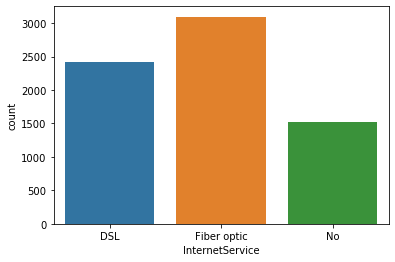

In [35]:
sns.countplot("InternetService", data=df)

In [36]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Internet service variable is definitely important in predicting churn rate. As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection. However, it is not a good way to make assumptions based on only one variable. Let's also check the monthly charges.

In [37]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

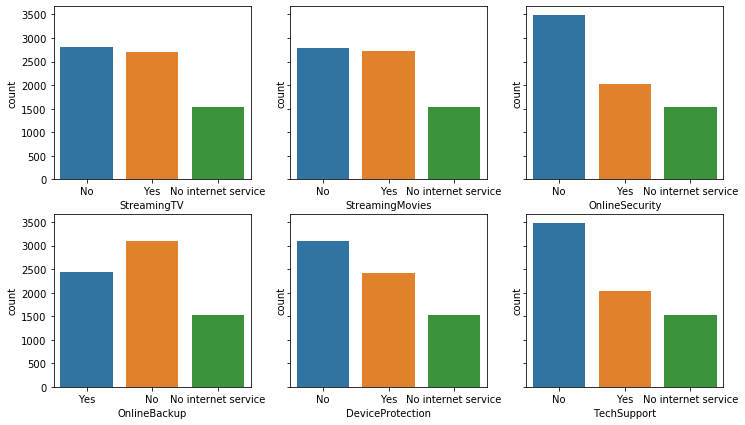

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [39]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [40]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [41]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [42]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [43]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


All internet service related features seem to have different churn rates for their classes.

**Phone service**

In [44]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [45]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. MultipleLines column takes the PhoneService column one step further.

In [46]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


**Contract, Paymengt Method**

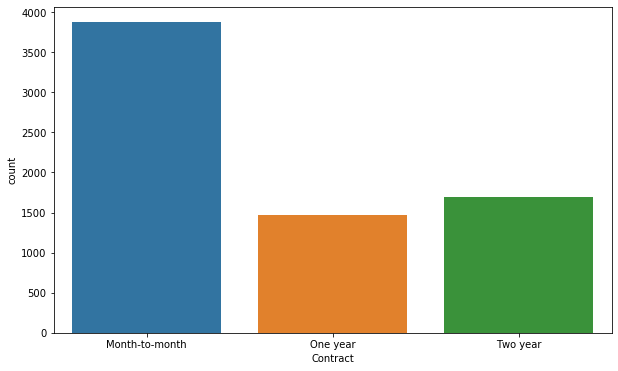

In [47]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

In [48]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

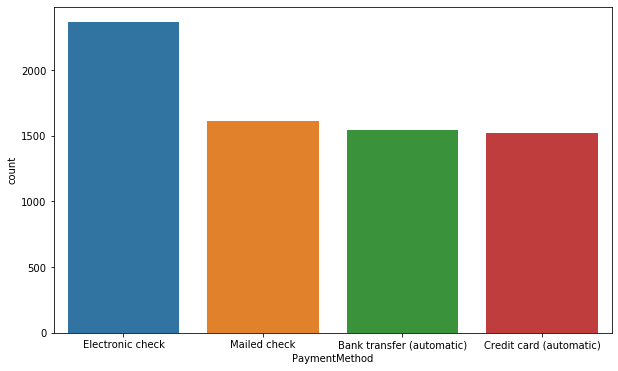

In [49]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

In [50]:
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


### **Continuous Variables**

The continuous features are tenure, monthly charges and total charges. The amount in total charges columns is proportional to tenure (months) multiplied by monthly charges. So it is unnecessary to include total charges in the model. Adding unnecassary features will increase the model complexity. It is better to have a simpler model when possible. Complex models tend to overfit and not generalize well to new, previously unseen observations. Since the goal of a machine learning model is to predict or explain new observations, overfitting is a crucial issue.


Let's also have a look at the distribution of continuous features.

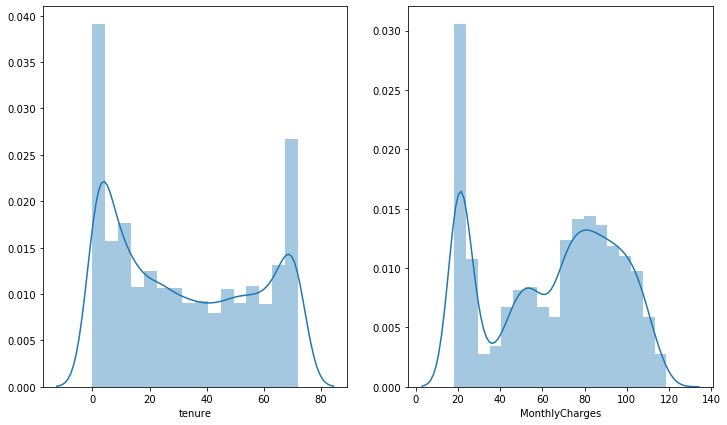

In [51]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [52]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in months for people who left the company is 20 months less than the average for people who stay.

It seems like monthly charges also have an effect on churn rate.

Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company. Let's figure out.

In [53]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


As expected, contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model: 1) Customer ID 2) Gender 3) PhoneService 4) Contract 5) TotalCharges

In [54]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [55]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


## Data Preprocessing¶

Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them). For example, "DSL" internet service is not superior to "Fiber optic" internet service. An example for an ordinal categorical variable would be ratings from 1 to 5 or a variable with categories "bad", "average" and "good".

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to do encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.

We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [57]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [58]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

In [59]:
X['tenure'] = a
X['MonthlyCharges'] = b

In [60]:
X.shape

(7043, 26)

## Resampling¶

As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired for machine learning models. I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

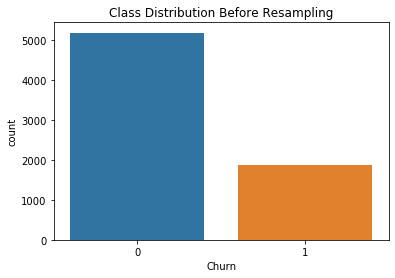

In [61]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [62]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [63]:
print(len(X_no),len(X_yes))

5174 1869


In [64]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [65]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

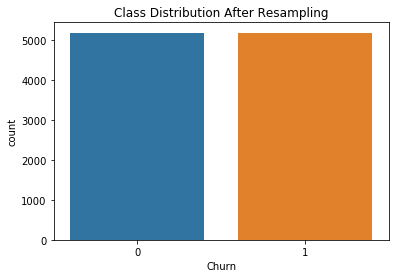

In [66]:
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

## ML model¶

We need to divide the data set into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Ridge Classifier¶

I have decided to use ridge classifier as a base model. Then I will try a model that I think will perform better.

In [70]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [71]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [72]:
pred = clf_ridge.predict(X_train)  #make predictions on training set

In [73]:
accuracy_score(y_train, pred) #accuracy on training set

0.7574293307562213

In [74]:
confusion_matrix(y_train, pred)

array([[3051, 1079],
       [ 929, 3219]], dtype=int64)

In [75]:
pred_test = clf_ridge.predict(X_test)

In [76]:
accuracy_score(y_test, pred_test)

0.7608695652173914

The model achieved 75% accuracy on training set and 76% accuracy on test set. The model is not overfitting because accuracies on training and test sets are pretty close. However, 75% accuracy is not very good so we will try to get a better accuracy using a different model.

## Random Forests

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)

In [79]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
pred = clf_forest.predict(X_train)

In [81]:
accuracy_score(y_train, pred)

0.8858419908190384

In [82]:
confusion_matrix(y_train, pred)

array([[3421,  709],
       [ 236, 3912]], dtype=int64)

In [83]:
pred_test = clf_forest.predict(X_test)

In [84]:
accuracy_score(y_test, pred_test)

0.842512077294686

The accuracy on training set is 4% higher than the accuracy on test set which indicates a slight overfitting. We can decrease the depth of a tree in the forest because as trees get deeper, they tend to be more specific which results in not generalizing well. However, reducing tree depth may also decrease the accuracy. So we need to be careful when optimizing the parameters. We can also increase the number of trees in the forest which will help the model to be more generalized and thus reduce overfitting. Parameter tuning is a very critical part in almost every project.

Another way is to do cross-validation which allows to use every sample in training and test set.

GridSearchCV makes this process easy to handle. We can both do cross-validation and try different parameters using GridSearchCV.

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)


cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset. At each iteration, 4 subsets are used in training and the other subset is used as test set. When 5 iteration completed, the model used all samples as both training and test samples.

n_jobs parameter is used to select how many processors to use. -1 means using all processors.

In [87]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [88]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [89]:
clf.best_score_

0.8999814141583954

We have achieved an overall accuracy of almost 90%. This is the mean cross-validated score of the best_estimator. In the previous random forest, the mean score was approximately 86% (88% on training and 84% on test). Using GridSearchCV, we improved the model accuracy by 4%.